# **IMporting libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('Breast Cancer Diagnosis Dataset with Tumor Characteristics.csv')

# **Load and Explore Data**

In [3]:
# Display the first 10 rows
print("First 10 rows:")
print(df.head(10))

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Descriptive statistics
print("\nDescriptive statistics:")
print(df.describe())

First 10 rows:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760  

# **Data Preprocesing**



In [4]:
# 1. Drop irrelevant columns
df = df.drop(columns=['id', 'Unnamed: 32'])  # Drop 'id' and 'Unnamed: 32'

# 2. Convert the 'diagnosis' column from categorical to numerical
# M = 1 (Malignant), B = 0 (Benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# 3. Normalize or Standardize the features (optional)
# We exclude the 'diagnosis' column (which is the target) during scaling
features = df.drop(columns=['diagnosis'])  # Features only, excluding the target

# Standardizing the features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back into a DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)

# Add the target column back
df_scaled['diagnosis'] = df['diagnosis']

# Display the first few rows of the scaled DataFrame
print("\nProcessed DataFrame (First 10 rows):")
print(df_scaled.head(10))

# Check if everything looks fine, e.g., no missing values, and all columns scaled correctly
print("\nCheck for missing values:")
print(df_scaled.isnull().sum())



Processed DataFrame (First 10 rows):
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   
5    -0.476375     -0.835335       -0.387148  -0.505650         2.237421   
6     1.170908      0.160649        1.138125   1.095295        -0.123136   
7    -0.118517      0.358450       -0.072867  -0.218965         1.604049   
8    -0.320167      0.588830       -0.184080  -0.384207         2.201839   
9    -0.473535      1.105439       -0.329482  -0.509063         1.582699   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.

# **Splitting Data**

In [5]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_scaled.drop(columns=['diagnosis'])  # Features
y = df_scaled['diagnosis']  # Target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes to confirm the split
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (455, 30)
Testing data shape: (114, 30)


# **Implement Knn Clasifier**

KNN Model Accuracy: 0.95


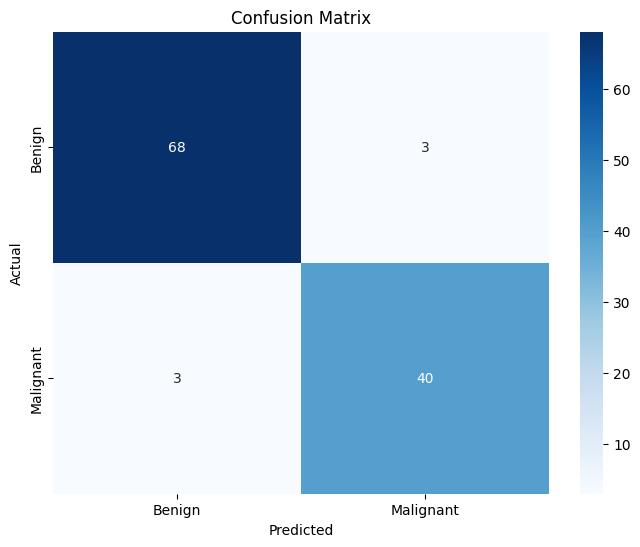

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Initialize the KNN classifier with n_neighbors=5
knn = KNeighborsClassifier(n_neighbors=5)

# 2. Train the KNN classifier using the training data
knn.fit(X_train, y_train)

# 3. Predict the tumor diagnosis on the test data
y_pred = knn.predict(X_test)

# 4. Calculate the accuracy of the KNN model
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Model Accuracy: {accuracy:.2f}")

# 5. Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# 6. Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


# **IMplementing logistic regression**

Logistic Regression Model Accuracy: 0.97


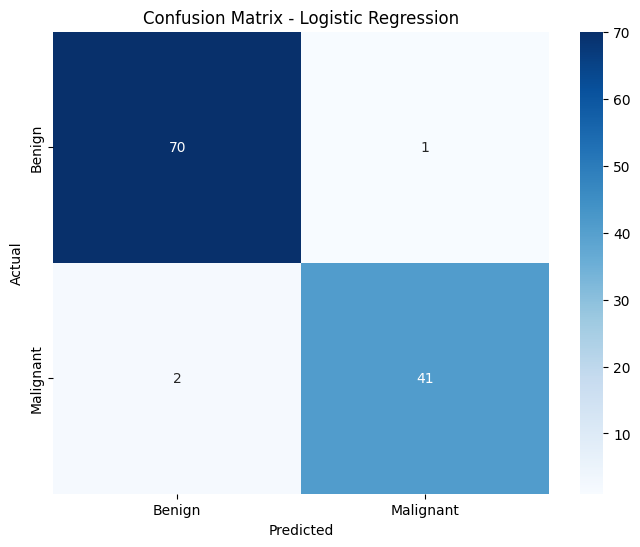

Classification Report:

              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        71
   Malignant       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# 2. Train the model using the training data
log_reg.fit(X_train, y_train)

# 3. Predict the tumor diagnosis on the test data
y_pred_log_reg = log_reg.predict(X_test)

# 4. Calculate the accuracy of the Logistic Regression model
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Model Accuracy: {log_reg_accuracy:.2f}")

# 5. Generate the confusion matrix
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# 6. Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.title("Confusion Matrix - Logistic Regression")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# 7. Print the classification report (precision, recall, F1-score)
print("Classification Report:\n")
print(classification_report(y_test, y_pred_log_reg, target_names=["Benign", "Malignant"]))


# **Comparison of KNN and Logistic Regression:**

**Model Comparison: KNN vs Logistic Regression**

Performance Metrics:

**KNN Accuracy: 95%**

**Logistic Regression Accuracy: 97%**

**Logistic Regression F1-Score: Benign = 0.98, Malignant = 0.96**


Logistic Regression edges out KNN with a higher accuracy (97% vs. 95%) and better F1-scores for both classes, meaning it’s slightly better at balancing precision and recall.
Which Model is More Appropriate?

Logistic Regression is likely the better choice here. It’s not only more accurate but also better at distinguishing between benign and malignant cases. It’s also quicker and simpler to interpret compared to KNN, which can be slower and more sensitive to settings like the number of neighbors.
Overall, Logistic Regression seems to fit this classification problem well!

# **Hyperparameter Tuning and Cross-Validation**

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

# Print the results
print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {best_accuracy:.2f}")


Best Parameters: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Best Accuracy: 0.96


# **Cross-Validation for Logistic Regression:**

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Perform 5-fold cross-validation
scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')

# Calculate mean and standard deviation of accuracy
mean_accuracy = scores.mean()
std_deviation = scores.std()

# Print the results
print(f"Cross-Validated Accuracy: {mean_accuracy:.2f} ± {std_deviation:.2f}")


Cross-Validated Accuracy: 0.98 ± 0.01


# **PCA**

In [10]:
from sklearn.decomposition import PCA
import numpy as np

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)


# **Train Models on Reduced Data**

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Initialize the models
knn = KNeighborsClassifier(n_neighbors=5)
log_reg = LogisticRegression(max_iter=1000)

# Train the models
knn.fit(X_pca, y_train)
log_reg.fit(X_pca, y_train)


LogisticRegression(max_iter=1000)

# **Create Mesh Grid for Decision Boundary**

In [12]:
import matplotlib.pyplot as plt

# Create a mesh grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))


# **Plot Decision Boundaries**

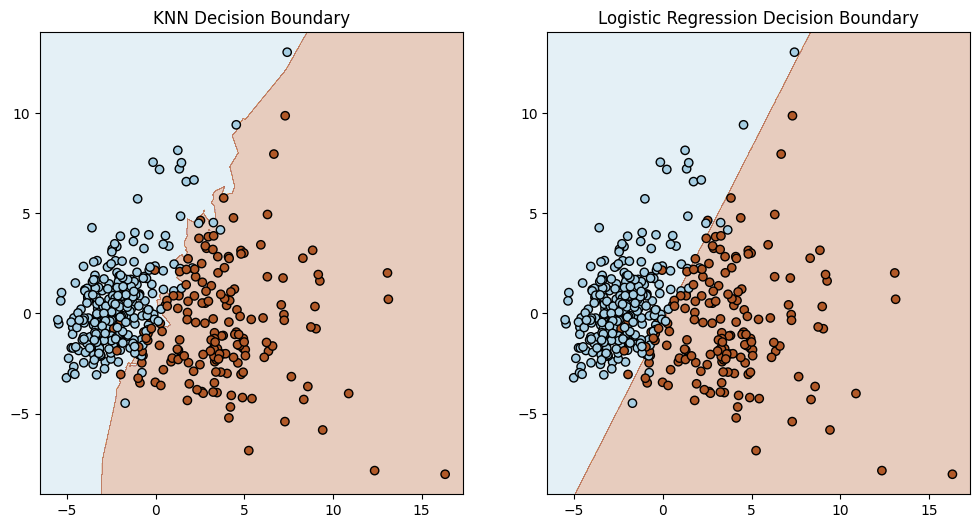

In [13]:
def plot_decision_boundary(model, X, y, ax, title):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    ax.set_title(title)
    return scatter

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for KNN
plot_decision_boundary(knn, X_pca, y_train, axs[0], 'KNN Decision Boundary')

# Plot for Logistic Regression
plot_decision_boundary(log_reg, X_pca, y_train, axs[1], 'Logistic Regression Decision Boundary')

plt.show()
